In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [112]:
# carregar os dados do CSV
df = pd.read_csv("dados_3_meses.csv", sep=";")

# conversão dos dados
df['data'] = pd.to_datetime(df['data'])
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S')


In [ ]:
# calcular a energia gerada (Wh) = irradiação * tempo (em horas) * área do painel * eficiência
tempo_horas = 0.25 # 15 minutos
area_painel = 2 # m2 - área média 

def eficiencia_energetica(status):
    if status == "Operando...":
        return 0.18
    elif status == "Falha":
        return 0.05
    else:
        return 0.0
    
energia_por_registro = df.apply(lambda x: round(x['irradiacao_solar'] * eficiencia_energetica(x['status_painel']) * tempo_horas * area_painel), axis=1) 

# Verificar o quanto de energia o painel gera por dia (Wh), com base na eficiência energética do painel solar
energia_gerada_dia = energia_por_registro.groupby(df['data']).sum()
print(energia_gerada_dia)

data
2025-02-01     961
2025-02-02    2142
2025-02-03    2389
2025-02-04    2116
2025-02-05    1978
              ... 
2025-04-26    2271
2025-04-27    2596
2025-04-28    2169
2025-04-29    2109
2025-04-30    1090
Length: 89, dtype: int64


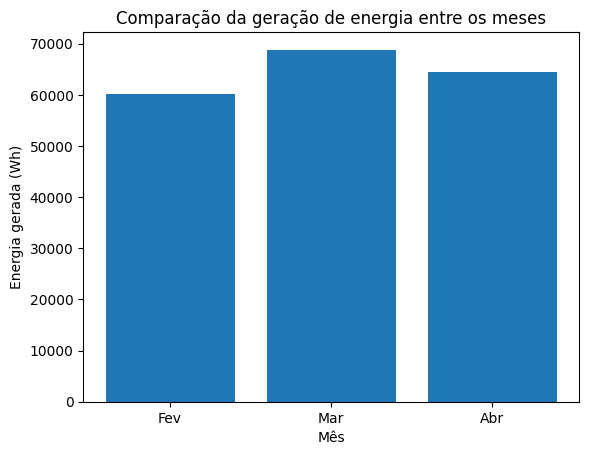

In [115]:
# Mês mais produtivo (maior energia gerada)
df_temp = pd.DataFrame({
    'mes': df['data'].dt.month,
    'energia': energia_por_registro
})
energia_por_mes = df_temp.groupby('mes')['energia'].sum()
x = energia_por_mes.index # index - meses
y = energia_por_mes.values # values - valores somados de energia para cada mês
plt.bar(x,y)
plt.xlabel("Mês")
plt.ylabel("Energia gerada (Wh)")
plt.xticks([2, 3, 4], ['Fev', 'Mar', 'Abr'])
plt.title("Comparação da geração de energia entre os meses")
plt.show()



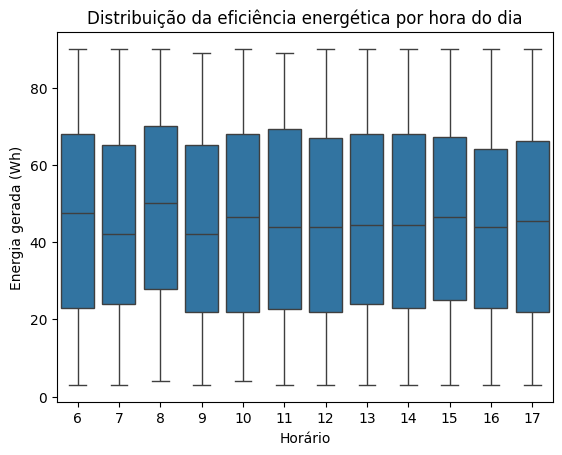

In [116]:
# Desempenho do painel durante o dia (quais horários o desempenho do painel é mais eficiente)
# boxplot para ver a distribuição de energia por horário
df['hora'] = df['hora'].dt.hour
df = df[(df['hora'] >=6) & (df['hora'] < 18)]
# nova energia_por_registro contendo menos registros (apenas horários entre 6 e 17:59)
energia_por_registro = df.apply(lambda x: round(x['irradiacao_solar'] * eficiencia_energetica(x['status_painel']) * tempo_horas * area_painel), axis=1)
df_temp = pd.DataFrame({
    'hora': df['hora'],
    'energia': energia_por_registro
})

sns.boxplot(x='hora', y='energia', data=df_temp)
plt.xlabel("Horário")
plt.ylabel("Energia gerada (Wh)")
plt.title("Distribuição da eficiência energética por hora do dia")
plt.show()


In [ ]:
# Em quais horários do dia há maior probabilidade de falhas
# 6 7 8 9 10 11 12 13 14 15 16 17 18


In [ ]:
# Relação entre índice de falhas e temperatura do painel
# 40 50 60 70

In [ ]:
# Faixa de temperatura ambiental em que o painel apresenta menos falhas
# 24-26 27-29 30-32 33-35